# Assigment 2: Logistic Regression

## 1. Logistic regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

### 1.1 Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [3]:
def plotData(X, y):
    """plotData(X, y) plots the data points with + for the positive examples
       and o for the negative examples. X is assumed to be a Mx2 matrix.
    """
    fig, ax = plt.subplots(figsize=(9, 6))
    
    # positive data points, USING MASK y==1
    ax.plot(X[y==1, 0], X[y==1, 1], '+', markersize=8, label='Admitted')
    # negative data points, USING MASK y==0
    ax.plot(X[y==0, 0], X[y==0, 1], 'o', markersize=8, label='Not admitted')
    
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    ax.legend(loc='upper right')
    
    return fig, ax

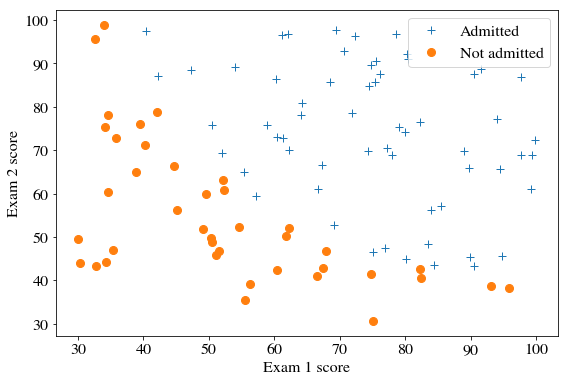

In [4]:
# load data
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2] 
# make sure y is 2D array, otherwise y may trigger broadcasting in later
# matrix arithmetic calculations and it is not easy to catch.

fig, ax = plotData(X, y)

### 1.2 Sigmoid function
Recall that the logistic regression hypothesis is defined as:
$$ h_\theta(x)=g(\theta^Tx)$$

where function g is the sigmoid function. The sigmoid function is defined as:
$$ g(z)=\frac{1}{1+e^{-z}}$$

In [5]:
def sigmoid(z):
    """sigmoid(z) computes the sigmoid of z. z can be a number,
    vector, or matrix. 
    """
    
    g = 1 / (1 + np.exp(-z))
    
    return g

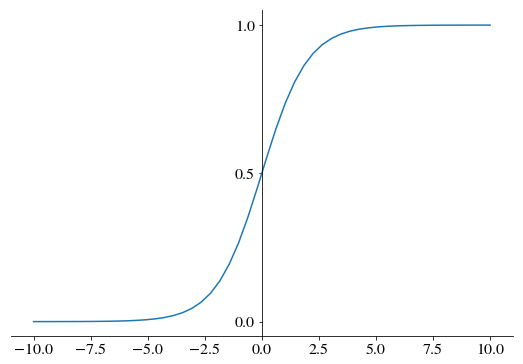

In [6]:
# Visualize sigmoid function
z = np.linspace(-10, 10)
g = sigmoid(z)

fig, ax = plt.subplots(figsize=(9, 6))
# move left y-axis to center
ax.spines['left'].set_position('center')
# eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_yticks(np.array([0, 0.5, 1]))

ax.plot(z, g)

### 1.3 Cost function and gradient descent
Recall that the cost function in logistic regression is:
$$ J(\theta)=\frac{1}{m}\sum_{i=0}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$

and the gradient of the cost is a vector with the same length as $\theta$ where the jth element is defined as:
$$ \frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)}-y{(i)})x_j^{(i)}$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

#### Vectorization
When calculating the above functions in MATLAB or Python, try vectorizing them. Assume $\mathbf X$ is a m-by-(n+1) matrix containing training sample inputs and additional 1s, $\mathbf y$ is m-by-1 vector containing training sample outputs, $\mathbf \theta$ is (n+1)-by-1 vector containing parameters in hypothesis $h_\theta$, then cost function can be vectorized as: 
$$ J(\theta)=\frac{1}{m} (-\mathbf y^T log(g(\mathbf{X\theta}))-(1-y^T)log(1-g(\mathbf{X\theta})))$$

while,
$$ \frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \mathbf X^T (g(\mathbf{X\theta})-\mathbf y)$$

Note that $J(\theta)$ is a number, while the gradient $\frac{\partial J(\theta)}{\partial \theta}$ is a (n+1)-by-1 vector.

In [7]:
def costFunction(theta, X, y):
    """costFunction(theta, X, y) computes the cost using theta as the
       parameter for logistic regression and the gradient of the cost
       w.r.t. to the parameters.
    """
    
    m = len(y)
    
    # prepare for matrix arithmetic calculations
    y = y[:, np.newaxis]
    theta = theta[:, np.newaxis]
    
    J = -(np.dot(y.T, np.log(sigmoid(np.dot(X,theta)))) + np.dot((1-y.T), np.log(1-sigmoid(np.dot(X, theta))))) / m
    #print(J.shape)
    J = J[0, 0]
    
    grad = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y)) / m
    #print(grad.shape)
    
    return J, grad

In [8]:
# set up data for gradient descent
m, n = X.shape

# add intercept term to X
X_wb = np.concatenate((np.ones((m, 1)), X), axis=1)

theta0 = np.zeros(n+1)

# run gradient descent
cost, grad = costFunction(theta0, X_wb, y)

# Display result
print('Cost at test theta: {:.5f}'.format(cost))
print('Expected cost is approx 0.693')
print('Gradient at initial theta: \n{}'.format(grad))
print('Expected gradient is: \n-0.1000\n -12.0092\n -11.2628\n')

# another test
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X_wb, y)

# Display result
print('Cost at test theta: {:.5f}'.format(cost))
print('Expected cost is approx 0.218')
print('Gradient at initial theta: \n{}'.format(grad))
print('Expected gradient is: \n0.043\n 2.566\n 2.647\n')

Cost at test theta: 0.69315
Expected cost is approx 0.693
Gradient at initial theta: 
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradient is: 
-0.1000
 -12.0092
 -11.2628

Cost at test theta: 0.21833
Expected cost is approx 0.218
Gradient at initial theta: 
[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]
Expected gradient is: 
0.043
 2.566
 2.647



### 1.4 Learning parameters using unconstrained minimization functions
In MATLAB, fminunc is an optimization solver that finds the minimum of an unconstrained function. See https://www.mathworks.com/help/optim/ug/fminunc.html#but9rn9-5

In Python, scipy.optimize.minimize() function seems to do the same thing. See https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

#### Notes for SciPy's minimization function
*scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)*
- method='TNC' works!!! Don't know why. TNC is truncated Newton algorithm. 
- x0 **must** be of shape (n,), i.e. 1D array, instead of 2D; **Furthermore, I think as a rule of thumb, use 1D array as a natural choice, unless encountered matrix multiplication where you have to extend it to 2D vector.**
- use args to include X and y
- No need to separate cost and gradient function. Set jac to True, then fun is assumed to return the gradient along with the objective function. 

#### Implementation 1 - Use above costFunction

In [9]:
from scipy.optimize import minimize

# initial conidition, 1d array
theta0 = np.zeros(n+1)

# run optimization
result = minimize(costFunction, theta0, args=(X_wb, y), method='TNC', jac=True, options={'disp': True, 'maxiter':400})
print(result)

     fun: 0.20349770158947536
     jac: array([[  9.09409796e-09],
       [  9.53481005e-08],
       [  4.73354162e-07]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131843,   0.20623159,   0.20147148])


#### Implementation 2 - separate cost and gradient function

In [10]:
# Separate cost and gradient from the return of the costFunction

def costF(theta, X, y):
    """costFunction(theta, X, y) computes the cost using theta as the
       parameter for logistic regression and the gradient of the cost
       w.r.t. to the parameters.
    """
    
    m = len(y)
    
    # prepare for matrix arithmetic calculations
    y = y[:, np.newaxis]
    theta = theta[:, np.newaxis]
    
    J = -(np.dot(y.T, np.log(sigmoid(np.dot(X,theta)))) + np.dot((1-y.T), np.log(1-sigmoid(np.dot(X, theta))))) / m
    
    return J


def gradientF(theta, X, y):
    """costFunction(theta, X, y) computes the cost using theta as the
       parameter for logistic regression and the gradient of the cost
       w.r.t. to the parameters.
    """
    
    m = len(y)
    
    # prepare for matrix arithmetic calculations
    y = y[:, np.newaxis]
    theta = theta[:, np.newaxis]
    
    grad = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y)) / m
    
    return grad.flatten()

In [11]:
# initial conidition, 1d array
theta0 = np.zeros(n+1)

# run optimization
result = minimize(costFunction, theta0, args=(X_wb, y), method='TNC', jac=True, options={'disp': True, 'maxiter':400})
print(result)

     fun: 0.20349770158947536
     jac: array([[  9.09409796e-09],
       [  9.53481005e-08],
       [  4.73354162e-07]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131843,   0.20623159,   0.20147148])


## 3. Regularized Logistic Regression

Cost function is:

$$\large J(\theta)=\frac{1}{m}\sum_{i=0}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$

Note that j is from 1 and doesn't include j=0.
The jth element of the gradient of the cost function is:

$$\large \frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)}-y{(i)})x_j^{(i)},\qquad j=0$$

$$\large \frac{\partial J(\theta)}{\partial \theta_j}=\left(\frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)}-y{(i)})x_j^{(i)}\right)+\frac{\lambda}{m}\theta_j,\qquad j=1,...$$

The vectorized functions will be:

$$\large J(\theta)=\frac{1}{m} (-\mathbf y^T log(g(\mathbf{X\theta}))-(1-y^T)log(1-g(\mathbf{X\theta})))+\frac{\lambda}{2m}\mathbf \theta_{1n}^T\theta_{1n}$$

where $\mathbf \theta_{1n}$ is vector $\mathbf \theta$ without $\theta_0$

The first element of the gradient will be:

$$\large \frac{\partial J(\theta)}{\partial \theta_0}=\frac{1}{m} \mathbf X^T(1,:) (g(\mathbf{X\theta})-\mathbf y)\qquad where\; \mathbf X^T(1,:)\; is\; first\; row\; of\; \mathbf X^T$$

The rest will be:

$$\large \frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \mathbf X^T(2:end,:) (g(\mathbf{X\theta})-\mathbf y)+\frac{\lambda}{m}\mathbf \theta(2:end)\qquad where\; \mathbf X^T(2:end,:)\; is\; the\; rest\; of\; \mathbf X^T$$